<a href="https://colab.research.google.com/github/sitikharomah/202255202001-Siti-Kharomah/blob/main/%5B3%5DKlasifikasi_DatasetMultilabel_Telur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!pip install -q tensorflow

In [3]:
import tensorflow as tf
#from keras.preprocessing.image import ImageDataGenerator # This line is incorrect
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras instead

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from keras.layers import BatchNormalization

In [6]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
import os
os.environ["KAGGLE_USERNAME"] = "skharomah"  # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "c/content/kaggle.json"  # Ganti dengan key yang ada di kaggle.json

In [8]:
!kaggle datasets download -d skharomah/klasifikasi-multilabel-telur
!unzip klasifikasi-multilabel-telur.zip

Dataset URL: https://www.kaggle.com/datasets/skharomah/klasifikasi-multilabel-telur
License(s): CC0-1.0
Archive:  klasifikasi-multilabel-telur.zip
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505001.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505002.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505003.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505004.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505005.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505006.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505007.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505008.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505009.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505010.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505011.jpg  
  inflating: Data

In [10]:
# Membaca metadata untuk mendapatkan Y values
df = pd.read_csv('/content/traindataset_siti kharomah_202255202001.csv', sep=';')

# Mencetak 10 baris secara acak
print(df.sample(10))  # Mencetak 10 baris acak
print(df.columns)

              id                                        jenis telur  \
177  jt202505178             telur puyuh, telur ayam, telur kampung   
257  jt202505258  telur bebek, telur puyuh, telur ayam,  telur k...   
130  jt202505131               telur bebek, telur puyuh, telur asin   
3    jt202505004                           telur bebek, telur ayam    
183  jt202505184             telur puyuh, telur asin, telur kampung   
23   jt202505024                          telur bebek, telur puyuh    
283  jt202505284  telur bebek, telur puyuh, telur ayam,  telur asin   
301  jt202505302  telur puyuh, telur ayam,  telur asin, telur ka...   
188  jt202505189             telur puyuh, telur asin, telur kampung   
49   jt202505050                            telur puyuh, telur ayam   

     telur bebek  telur puyuh   telur ayam  telur asin  telur kampung  
177            0            1            1           0              1  
257            1            1            1           0              1  
13

In [11]:
SIZE = 200
X_dataset = []
image_directory = '/content/DatasetMultilable_Siti Kharomah_202255202001/'

for i in tqdm(range(df.shape[0])):
    img = image.load_img(image_directory + df['id'][i] + '.jpg', target_size=(SIZE, SIZE, 3))
    img = image.img_to_array(img)
    img = img / 255.
    X_dataset.append(img)

X = np.array(X_dataset)

100%|██████████| 309/309 [00:36<00:00,  8.56it/s]


In [12]:
# Memisahkan fitur dan label
y = np.array(df.drop(['id', 'jenis telur'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [13]:
# Augmentasi Data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:
# Transfer Learning dengan VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='sigmoid'))  # Output sesuai jumlah kelas

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Mengunci lapisan dasar
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Melatih model dengan augmentasi data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 202s 31s/step - accuracy: 0.2656 - loss: 0.9966 - val_accuracy: 0.3441 - val_loss: 0.6675
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 186s 28s/step - accuracy: 0.2756 - loss: 0.7418 - val_accuracy: 0.3011 - val_loss: 0.6841
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 153s 23s/step - accuracy: 0.2861 - loss: 0.6964 - val_accuracy: 0.2903 - val_loss: 0.6830
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 186s 28s/step - accuracy: 0.3017 - loss: 0.6847 - val_accuracy: 0.0645 - val_loss: 0.6864
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 186s 28s/step - accuracy: 0.2783 - loss: 0.7064 - val_accuracy: 0.2151 - val_loss: 0.6829
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 186s 29s/step - accuracy: 0.2905 - loss: 0.6822 - val_accuracy: 0.1720 - val_loss: 0.6765
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 188s 28s/step - accuracy: 0.3327 - loss: 0.6762 - val_accuracy: 0.1828 - val_loss: 0.6723
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 163s 22s/step - accuracy: 0.3207 - loss: 0.6838 - val_accuracy: 0.3871 - val_loss:

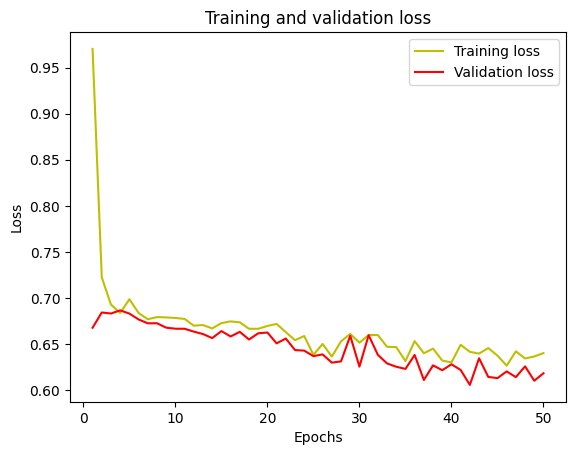

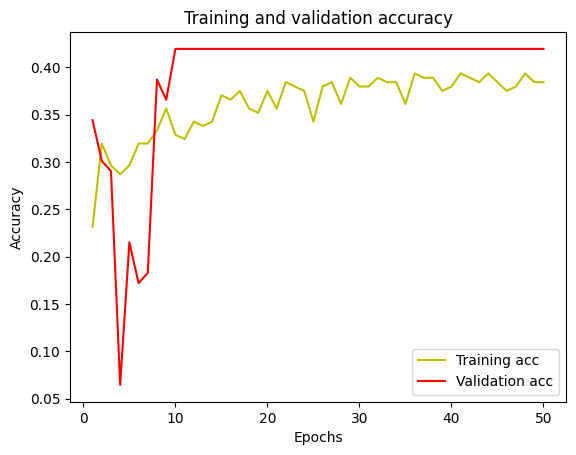

In [17]:
# Plot akurasi dan loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
# Evaluasi model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 14s/step


In [19]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 14s/step - accuracy: 0.4167 - loss: 0.6260
Accuracy =  41.93548262119293 %


In [20]:
# Classification report
print(classification_report(y_test, y_pred_classes, target_names=df.columns[2:]))

               precision    recall  f1-score   support

  telur bebek       0.71      0.96      0.82        51
  telur puyuh       0.66      1.00      0.79        61
   telur ayam       0.77      0.97      0.86        59
   telur asin       0.59      1.00      0.74        55
telur kampung       0.56      1.00      0.72        52

    micro avg       0.65      0.99      0.78       278
    macro avg       0.66      0.99      0.79       278
 weighted avg       0.66      0.99      0.79       278
  samples avg       0.66      0.99      0.78       278



In [21]:
# Confusion matrix
for i in range(y.shape[1]):
    print(f"Confusion Matrix for {df.columns[i + 2]}:")
    print(confusion_matrix(y_test[:, i], y_pred_classes[:, i]))

Confusion Matrix for telur bebek:
[[22 20]
 [ 2 49]]
Confusion Matrix for telur puyuh:
[[ 0 32]
 [ 0 61]]
Confusion Matrix for  telur ayam:
[[17 17]
 [ 2 57]]
Confusion Matrix for telur asin:
[[ 0 38]
 [ 0 55]]
Confusion Matrix for telur kampung:
[[ 0 41]
 [ 0 52]]
